# Proyecto 3: Resolución de la ecuación de Helmholtz

# Preeliminares: Elementos Finitos

## Bibliotecas requeridas

Se requiere de
* **Numpy**:
 Para el manejo de vectores y matrices, junto a procedimientos que involucren este tipo de información

* **Mathplotlib**:
  Se va a utilizar para visualizar la comparación entre los datos de la solución analítica.

* **Math**:
  Pra cualquier operación que se vaya a utilizar

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd

## Raíces

Calcula los nodos (raíces) y los pesos de la cuadratura de Gauss-Legendre para un polinomio de grado `q`.

La cuadratura de Gauss-Legendre se utiliza para evaluar integrales aproximadas con alta precisión al emplear puntos y pesos óptimos definidos sobre el intervalo $[-1, 1]$

**Entrada:**
* `q :int`

Grado del polinomio para el cual se desean calcular las raíces y los pesos. Debe estar en el rango $1 \leq q \leq$ 7.

**Salida:**

* `xq : numpy.ndarray`

Un arreglo de `q` valores que representan las raíces (nodos) del polinomio de Legendre en el intervalo $[-1, 1]$.
    
* `wq : numpy.ndarray`

Un arreglo de `q` valores que representan los pesos asociados a cada raíz, utilizados para calcular la integral.


In [19]:
def p_roots(q):
  if q==1:
    xq = np.array([0])
    wq=np.array([2])
  elif q == 2:
        xq = np.array([-0.5773502692, 0.5773502692])
        wq = np.array([1.0, 1.0])
  elif q == 3:
        xq = np.array([-0.7745966692, 0.0, 0.7745966692])
        wq = np.array([0.5555555556, 0.8888888889, 0.5555555556])
  elif q == 4:
        xq = np.array([-0.8611363116, -0.339981044, 0.339981044, 0.8611363116])
        wq = np.array([0.3478548451, 0.6521451549, 0.6521451549, 0.3478548451])
  elif q == 5:
        xq = np.array([-0.9061798459, -0.5384693101, 0.0, 0.5384693101, 0.9061798459])
        wq = np.array([0.2369268851, 0.4786286705, 0.5688888889, 0.4786286705, 0.2369268851])
  elif q == 6:
        xq = np.array([-0.9324695142, -0.6612093865, -0.2386191861, 0.2386191861, 0.6612093865, 0.9324695142])
        wq = np.array([0.1713244924, 0.3607615730, 0.4679139346, 0.4679139346, 0.3607615730, 0.1713244924])
  elif q == 7:
        xq = np.array([-0.9491079123, -0.7415311856, -0.4058451514, 0.0, 0.4058451514, 0.7415311856, 0.9491079123])
        wq = np.array([0.1294849662, 0.2797053915, 0.3818300505, 0.4179591837, 0.3818300505, 0.2797053915, 0.1294849662])
  else:
      raise ValueError("Solo se permiten valores de grado entre 1 y 7")
  return xq, wq


## Cuadratura Gaussiana


  La función `gaussian_quad` implementa la fórmula de cuadratura Gauss-Legendre

  $$\int_{-1}^{1}f(x)dx \approx \sum_{i =1}^{q}w_{i}f(x_{i})$$
  
  Ésto evalúa la integral de `f` en el intervalo $[-1, 1]$ mediante los nodos (`xq`) y pesos (`wq`) previamente calculados.

**Entrada:**
    
*    `f : callable`

        Función a integrar. Debe ser evaluable en los puntos definidos
        por `xq`.
*    `xq : numpy.ndarray`

        Arreglo que contiene los nodos (raíces) del polinomio de Legendre
        en el intervalo [-1, 1].
*    `wq : numpy.ndarray`

        Arreglo que contiene los pesos asociados a los nodos, calculados
        según el grado de la cuadratura.

**Salida:**
    
* `result : float`
  Aproximación del valor de la integral definida de `f` en el intervalo $[-1, 1]$

    

In [20]:
def gaussian_quad(f, xq, wq):
  result = np.sum(f(xq) * wq)
  return result

## Transformación y su inversa


### Transformación



Transforma un intervalo estándar $[-1, 1]$ al intervalo $[a, b]$.
Esta transformación lineal es útil para aplicar cuadratura de Gauss en un intervalo arbitrario $[a, b]$, trasladando los nodos de la cuadratura estándar a este nuevo intervalo.

$$T(x) :=  \frac{(b-a)x+(b+a)}{2}$$

**Entrada:**
    
* `x : float o numpy.ndarray`

  Punto(s) en el intervalo estándar [-1, 1] que se desea transformar.

* ` a : float`

  Límite inferior del nuevo intervalo.
* ` b : float`

  Límite superior del nuevo intervalo.

**Salida:**

* `float o numpy.ndarray`

  Punto(s) transformados al intervalo $[a, b]$.

    


In [21]:
def T(x,a,b):
  return 0.5*(b-a)*x + 0.5*(b+a)

### Inversa


Transforma un punto del intervalo $[a, b]$ al intervalo estándar $[-1, 1]$. Es la inversa de la transformación `T`. Esto permite trabajar nuevamente en el dominio estándar después de realizar una transformación a $[a, b]$.

$$T^{-1}(x) = \frac{2}{b-a}\cdot\left(x-\frac{a+b}{2}\right)$$

**Entrada:**

*    `x : float o numpy.ndarray`

        Punto(s) en el intervalo [a, b] que se desea transformar de vuelta a [-1, 1].
*    `a : float`

        Límite inferior del intervalo original.

*    `b : float`

        Límite superior del intervalo original.

**Salida:**

*    `float o numpy.ndarray`

  Punto(s) transformados al intervalo estándar $[-1, 1]$


In [22]:
def T_inv(x,a,b):
  return (2/b-a)((x-a)-1)

## Definición de los Polinomios de Lagrange

Los polinomios de Lagrange son una forma de interpolación que usa una serie de puntos $(x_i,y_i)$. La fórmula general para el polinomio $L_{i}(x)$ está dada por

$$L_{i}(x):= \prod_{j=0 \\ j\neq i}^{n} \frac{x-x_{j}}{x_{i}-x_{j}}$$

En este caso, programar los polinomios implica un alto coste computacional, por ende tenemos que definir los polinomios de Lagrange y sus derivadas para $1\leq P\leq 3$ en base a consultas, pues con ello se reduce el coste computacional



### Funciones

In [23]:
#Polinomio grado 1
f01= lambda x:0.5*(1-x)
f11= lambda x:0.5*(1+x)

#Polinomio grado 2
f02= lambda x:0.5*x*(x-1)
f12= lambda x:-x*x + 1
f22= lambda x:0.5*x*(x+1)

#Polinomio grado 3
f03= lambda x:(-9/16)*x**3 + (9/16)*x**2 + (1/16)*x - 1/16
f13= lambda x:(27/16)*x**3 -  (9/16)*x**2 - (27/16)*x + 9/16
f23= lambda x:(-27/16)*x**3 - (9/16)*x**2 + (27/16)*x + 9/16
f33= lambda x:(9/16)*x**3 + (9/16)*x**2 - (1/16)*x - 1/16

### Derivadas

In [24]:
#Derivada grado 1
df01 = lambda x: -0.5
df11 = lambda x: 0.5

#Derivada grado 2
df02 = lambda x: 0.5 * (2 * x - 1)
df12 = lambda x: -2 * x
df22 = lambda x: x + 0.5

#Derivada grado 3
df03 = lambda x: -(27/16)*x**2 + 18/16*x + 1/16
df13 = lambda x: (81/16)*x**2 - (18/16)*x - 27/16
df23 = lambda x: -(81/16)*x**2 -(18/16)*x + 27/16
df33 = lambda x: (27/16)*x**2 + (18/16)*x - 1/16

### Creación de Diccionario

A partir de los datos sueltos, vamos a juntarlos en dos diccionarios, uno de para los polinomios que es `MD`, y otro para las derivadas (`dMD`)

In [25]:
#Diccionario de polinomios
MD = [
    {0: f01, 1: f11},
    {0: f02, 1: f12, 2: f22},
    {0: f03, 1: f13, 2: f23, 3: f33}
]

#Diccionario de derivadas
dMD = [
    {0: df01, 1: df11},
    {0: df02, 1: df12, 2: df22},
    {0: df03, 1: df13, 2: df23, 3: df33}
]

### Función definida de Lagrange y su derivada

Mediante esto, la fnción prácticamente será consultar los datos del diccionario.

#### Polinomio

 Evalúa el polinomio de Lagrange asociado al índice l y al grado p en el punto x.

**Entrada:**
*  `x : float`

      El punto donde se evaluará el polinomio.

*  `l : int`

  El índice del polinomio de Lagrange $0 \leq l \leq p$.

*  `p : int`

      El grado del polinomio $1\leq p \leq3$.

**Salida:**
    
* `f(x): float`

  Valor del polinomio de Lagrange en x.

In [26]:
def L(x,l,p):
  f=MD[p-1][l]
  return f(x)

#### Derivada

Evalúa la derivada del polinomio de Lagrange asociado al índice l y al grado p en el punto x.

**Entrada:**
*  `x : float`

  El punto donde se evaluará la derivada.
*  `l : int`

     El índice del polinomio de Lagrange $0  l \leq p$
*  `p : int`

   El grado del polinomio $1 \leq p \leq 3$

**Salida:**

*  `f(x):  float`


  Valor de la derivada del polinomio de Lagrange en x.


In [27]:
def dL(x,l,p):
  f=dMD[p-1][l]
  return f(x)

## Matrices de Masa y Rigidez

### Locales

#### De Masa


La matriz de masa local representa integrales de productos entre los polinomios de Lagrange $L_{i}(x)$ y $L_{j}(x)$, evaluados en un elemento. Por lo que el armado está dado por

$$M_{ij} = \int_{-1}^{1}L_{i}(x)\cdot L_{j}(x)$$

La simetría de la matriz se asegura computando una sola vez y asignando ambos valores cuando $M_{ij}\leftarrow M_{ji}$


**Entrada:**

* `p : int`

Grado del polinomio

* `xq, wq: numpy.ndarray`

Puntos y pesos de cuadratura de Gauss para la integración

**Salida:**
* `M : numpy.matrix`

Matriz de tamaño $(p+1)\times (p+1)$



In [28]:
def M_loc(p, xq, wq):
    #Inicializa una matriz local M para el almacenamiento de la matriz de masa
    M = np.zeros((p + 1, p + 1))
    #Rellena la matriz de masa integrando los productos de las funciones de base de Lagrange
    for i in range(p + 1):
      for j in range(p + 1):
        integrand = lambda x: L(x, i, p) * L(x, j, p)
        M[i, j] = gaussian_quad(integrand, xq, wq)
        M[j, i] = M[i, j]
    return M

#### De Rigidez

Por su parte, la matriz de rigidez local contiene las integrales del producto pero ahora de las derivadas de los polinomios de Lagrange, es totalmente análoga a la de rigidez

$$S_{ij} = \int_{-1}^{1}dL_{i}(x)\cdot dL_{j}(x)$$


**Entrada:**

* `p : int`

Grado del polinomio

* `xq, wq: numpy.ndarray`

Puntos y pesos de cuadratura de Gauss para la integración

**Salida:**

* `S : numpy.matrix`

Matriz de tamaño $(p+1)\times (p+1)$

In [29]:
def S_loc(p, xq, wq):
    # Inicializa una matriz local S para el almacenamiento de la matriz de rigidez
    S = np.zeros((p + 1, p + 1))
    # Rellena la matriz de rigidez integrando los productos de las derivadas de las funciones de base de Lagrange
    for i in range(p + 1):
        for j in range(p + 1):
            integrand = lambda x: dL(x, i, p) * dL(x, j, p)
            S[i, j] = gaussian_quad(integrand, xq, wq)
            S[j, i] = S[i, j]
    return S

### Globales $M,S$


**Entrada:**

- `p: int`  
  Grado del polinomio de base en cada elemento.  

- `x: list[float]`  
  Lista de coordenadas de los nodos globales que dividen el dominio.  

- `xq: list[float]`  
  Lista de puntos de cuadratura de Gauss-Legendre normalizados al intervalo $[-1, 1]$.  

- `wq: list[float]`
  Lista de pesos asociados a los puntos de cuadratura.  



**Salida:**


- `M: np.ndarray`

  Matriz de masa global de dimensiones $(Ne+1) \times (Ne+1)$  

- `S: np.ndarray`

  Matriz de rigidez global de dimensiones $(Ne+1) \times (Ne+1)$.  

In [30]:
def MS(p, x, xq, wq):
    N = len(x) - 1  # Número de elementos
    Ne = N * p  # Número de nodos globales es N*p + 1
    M, S = np.zeros((Ne+1, Ne+1)), np.zeros((Ne+1, Ne+1))  # Inicialización de matrices globales

    M_local = M_loc(p, xq, wq)
    S_local = S_loc(p, xq, wq)
    # Ciclo sobre los elementos para ensamblar
    for i in range(N):
      x_iL = x[i]     # Límite izquierdo del intervalo
      x_iR = x[i + 1] # Límite derecho del intervalo
      Ji = 0.5 * (x_iR - x_iL)  # Jacobiano del intervalo
      S_l = (1 / Ji) * S_local
      M_l =  Ji * M_local

      # Ensamblado global
      start = i * p
      end = start + p + 1

      # Sumar las matrices locales a las globales en los nodos correspondientes
      M[start:end, start:end] +=  M_l
      S[start:end, start:end] +=  S_l
    return M, S


## Vector b

La función `RHS` calcula el vector del lado derecho (RHS, por sus siglas en inglés) global, que aparece en la formulación débil del problema. Este vector representa la contribución de la función fuente $ f $ en todo el dominio discretizado, integrando localmente en cada elemento y ensamblando los resultados en el vector global.

El proceso se realiza mediante:

1. **Transformación local a global:** Se considera cada elemento del dominio definido por los nodos en `x`, transformando los puntos locales de integración al intervalo global correspondiente usando la función `T`.

2. **Cálculo local:** Para cada par de nodos del elemento, se evalúan las contribuciones usando la base de polinomios de Lagrange \( L \) y se integran numéricamente mediante cuadratura de Gauss.

3. **Ensamblaje global:** Las contribuciones locales de cada elemento se agregan al vector global `b`, tomando en cuenta los índices correspondientes.

El resultado es un vector `b` que incorpora las contribuciones de la función \( f \) en toda la malla, listo para ser utilizado en la resolución del sistema lineal asociado al problema.



**Entrada:**

- `f: function`

  Función que representa la fuente en el problema (puede depender de \(x\)).  

- `x: list[float]`

  Lista de coordenadas de los nodos globales que dividen el dominio.  

- `p: int`

  Grado del polinomio de base en cada elemento.  

- `xq: list[float]`

  Lista de puntos de cuadratura de Gauss-Legendre normalizados al intervalo $[-1, 1]$.  

- `wq: list[float]`

  Lista de pesos asociados a los puntos de cuadratura.  


**Salida:**

- `b: np.ndarray`  
  Vector del lado derecho (RHS) global de dimensión $(Ne+1)$.  

In [31]:
def RHS(f, x, p, xq, wq):
    N = len(x) - 1        # Número de elementos
    Ne = N * p            # Número total de nodos (sin contar nodos duplicados)
    b = np.zeros(Ne + 1)  # Vector resultado inicializado en ceros

    for i in range(N):
        start = i * p        # Índice de inicio en el vector b
        end = start + p + 1  # Índice de fin en el vector b (p+1 nodos por elemento)

        x_iL = x[i]               # Límite izquierdo del intervalo
        x_iR = x[i + 1]           # Límite derecho del intervalo
        Ji = 0.5 * (x_iR - x_iL)  # Jacobiano del intervalo

        b_local = np.zeros(p + 1)  # Vector local para acumulación de resultados

        # Cuadratura de Gauss para cada función de base en el intervalo actual
        for k in range(p + 1):
            # Definimos el integrando fk
            fk = lambda w: Ji * f(T(w, x_iL, x_iR)) * L(T(w, x_iL, x_iR), k, p)
            # Realizamos la cuadratura de Gauss
            b_local[k] = gaussian_quad(fk, xq, wq)

        # Acumulamos el resultado en el vector global b
        b[start:end] += b_local

    return b


## Aplicar condiciones de Dirichlet

La función `apply_dirichlet_conditions` modifica las matrices y vectores de un sistema lineal para aplicar condiciones de frontera de Dirichlet. Estas condiciones especifican valores fijos en los extremos del dominio, lo que se refleja en los nodos inicial y final de la malla.


**Entrada:**

- `S: numpy.ndarray`

  Matriz de rigidez global del sistema antes de aplicar condiciones de frontera.

- `b: numpy.ndarray`

  Vector del lado derecho global antes de aplicar condiciones de frontera.  

- `left_condition: float`

  Valor de la condición de frontera en el extremo izquierdo del dominio.  

- `right_condition: float`

  Valor de la condición de frontera en el extremo derecho del dominio.  

**Salida:**

- `S: numpy.ndarray`

  Matriz de rigidez modificada para incluir las condiciones de Dirichlet.  

- `b: numpy.ndarray`

  Vector del lado derecho modificado para incluir las condiciones de Dirichlet.

In [32]:
def apply_dirichlet_conditions(S, b, left_condition, right_condition):
    S[0, :] = 0
    S[0, 0] = 1
    S[-1, :] = 0
    S[-1, -1] = 1
    b[0] = left_condition
    b[-1] = right_condition
    return S, b

## Norma $L^{2}$

La función `L2_norm` calcula la norma $L^2$ entre una solución numérica `uk` y una solución exacta `u_exact` sobre un conjunto de puntos `x`. Este cálculo mide la diferencia promedio entre ambas soluciones en el dominio, ponderando la contribución de cada punto.

El proceso es:

1. **Diferencia cuadrática:** Calcula la diferencia cuadrada entre los valores numéricos y los valores exactos en cada punto del dominio.
2. **Pesos trapezoidales:** Ajusta los extremos del dominio con un factor de 0.5 para usar la regla del trapecio, una aproximación común en integrales numéricas.
3. **Integración discreta:** Usa los pasos del dominio `dx` y suma las diferencias ponderadas para obtener un valor aproximado de la integral.
4. **Raíz cuadrada:** Calcula la raíz cuadrada del resultado para obtener la norma $L^2$, que mide la magnitud del error en el dominio.

Esta métrica es particularmente útil en problemas numéricos porque proporciona una medida clara del error acumulado entre la solución numérica y la exacta.

**Entrada:**

- `uk:numpy.ndarray`  
  Vector con la solución numérica evaluada en los puntos del dominio `x`.  
- `u_exact:function`  
  Función que representa la solución exacta y que puede evaluarse en el dominio `x`.  
- `x:numpy.ndarray`  
  Vector con los puntos del dominio donde se evalúan las soluciones.  


**Salida:**

- `L2:float`  
  Norma \(L^2\) que representa la magnitud del error entre la solución numérica y la solución exacta.

In [33]:
def L2_norm(uk, u_exact, x):
    dx = np.max(np.diff(x))
    diff = (uk - u_exact) ** 2
    l2 = np.ones_like(uk)
    l2[0], l2[-1] = 0.5, 0.5
    return np.sqrt(dx * np.dot(diff, l2))

## Norma $H^{1}_{0}$

La función `H1_0_norm` calcula la norma $ H^1_0 $ entre una solución numérica `uk` y una solución exacta `u_exact` sobre un conjunto de puntos `x`. La norma $ H^1_0 $ mide tanto la diferencia entre las funciones como entre sus derivadas, proporcionando una medida más completa del error en el espacio de Sobolev $ H^1_0 $. Este espacio es relevante en problemas donde tanto la solución como sus derivadas tienen importancia, como en métodos de elementos finitos.

El cálculo se realiza en dos partes principales:

1. **Norma \(L^2\) de la solución:** Se calcula la norma \( L^2 \) entre `uk` y `u_exact` evaluada en `x`, que mide la diferencia punto a punto entre las soluciones numérica y exacta.
   
2. **Norma $L^2$ de las derivadas:** Calcula la norma $ L^2 $ entre las derivadas numéricas $( \nabla uk )$ y exactas ($ \nabla u_{exact} $) sobre el dominio `x`, usando la función `np.gradient` para obtener derivadas numéricas.

El resultado final es la raíz cuadrada de la suma de los cuadrados de estas dos contribuciones, siguiendo la definición estándar de la norma $ H^1_0 $.


**Entrada:**

- `uk:numpy.ndarray`  
  Solución numérica evaluada en los puntos del dominio `x`.  

- `u_exact:function`  
  Función de la solución exacta que puede evaluarse en el dominio `x`.  

- `x:numpy.ndarray`  
  Vector con los puntos del dominio donde se evalúan las soluciones.

- `xq:numpy.ndarray`  
  Puntos de cuadratura de Gauss-Legendre, aunque no se utilizan explícitamente en esta función.  

- `wq:numpy.ndarray`  
  Pesos de cuadratura de Gauss-Legendre, aunque no se utilizan explícitamente en esta función.  


**Salida:**

- `H1_0:float`  
  Norma $ H^1_0 $ que combina la diferencia en las soluciones y en sus derivadas, proporcionando una medida más completa del error.

In [34]:
def H_norm(uk, u_exact, y):
    r1 = L2_norm(uk, u_exact, y) ** 2 #diferencia entre la aproximacion numérica uk y la solución exacta u(y)
    grad_uk = np.gradient(uk, y)
    grad_u_exact = np.gradient(u_exact, y)
    r2 = L2_norm(grad_uk, grad_u_exact, y) ** 2#diferencia entre las derivadas de uk y u(y),
    return np.sqrt(r1 + r2)

# Ecuación de Helmotz


Sea $\Omega= [0,1]$ y $\varepsilon > 0$, consideremos la ecuación de Helmtotz modificada

$$-\varepsilon^{2}\Delta u+u=1,\quad x\in\Omega$$
$$u = 0,\quad x\in\partial\Omega$$

Donde $$\Delta u  = \frac{d^{2}u}{dx^{2}} $$

La solución analítica está dad por
$$u(x) = \frac{-\sinh\left(\frac{x}{\varepsilon}\right)+\sinh\left(\frac{x-1}{\varepsilon}\right)}{\sinh{\left(\frac{1}{\varepsilon}\right)}}+1$$

La cuál se codifica de la forma


```
u_exact = lambda x: (-np.sinh(x / epsilon) + np.sinh((x - 1) / epsilon)) / np.sinh(1 / epsilon) + 1

```

## Solución numérica

### Código

In [37]:
def Helmholtz(p, dx, xL, xR, xq, wq, epsilon, uL, uR, f, u_e):
    N = int((xR - xL) / dx)
    x = np.linspace(xL, xR,N + 1)
    y = np.linspace(xL,xR,(N*p)+1)
    M, S = MS(p, x, xq, wq)
    b = RHS(f, x, p, xq, wq)
    H = (epsilon**2) *( S )+M
    H, b = apply_dirichlet_conditions(H, b, uL, uR)
    uk = np.linalg.solve(H, b)
    plt.plot(y, u_e(y), label="Solución Exacta")
    plt.plot(y, uk, '*g', label="Solución Numérica")
    plt.legend()
    plt.show()
    eh = H_norm(uk, u_e(y), y)
    el=L2_norm(uk, u_e(y), y)
    return el,eh


### Cálculo de EOC

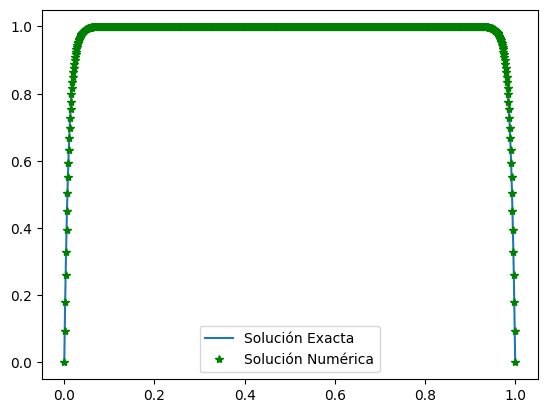

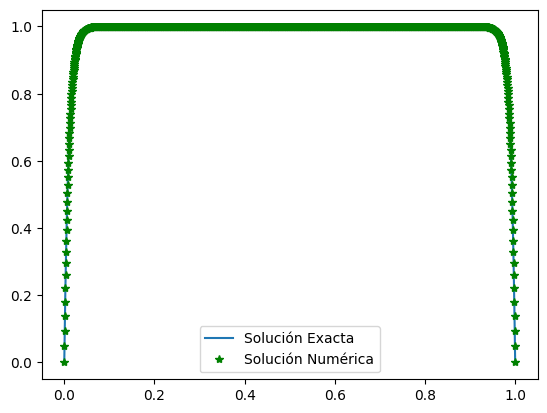

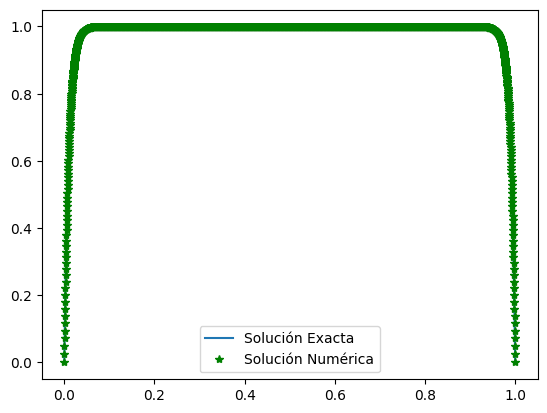

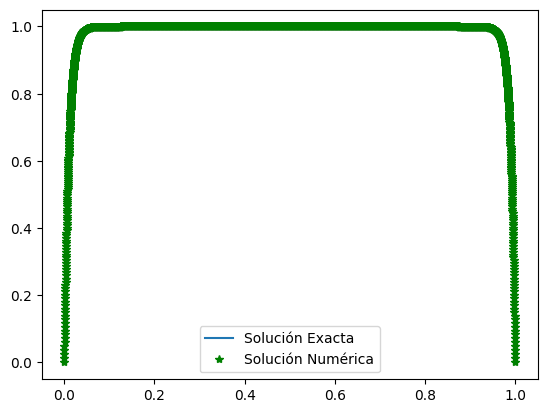

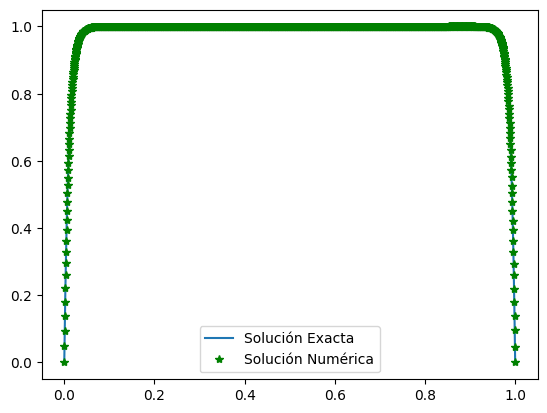

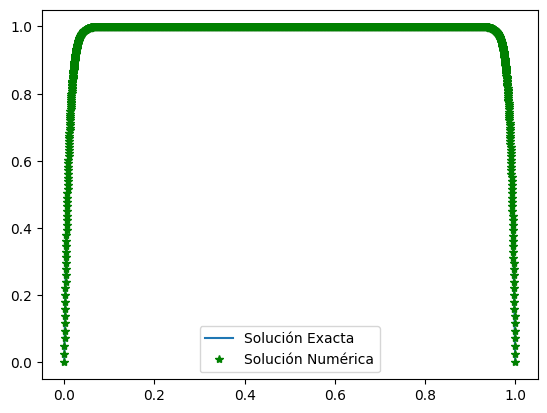

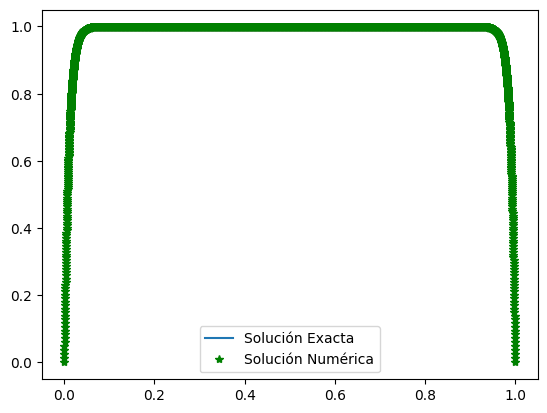

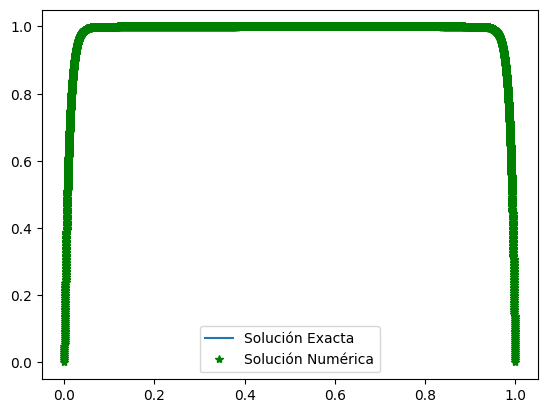

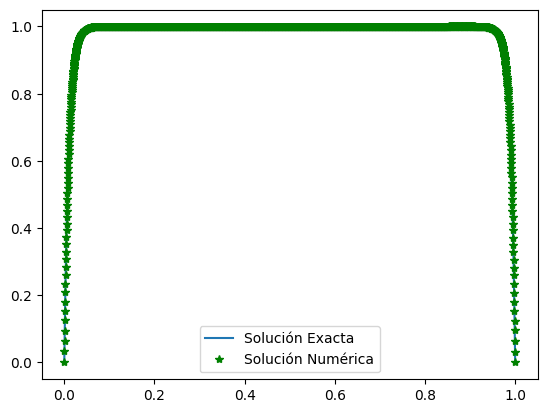

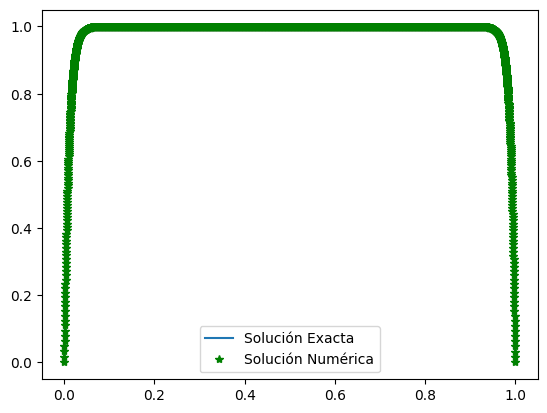

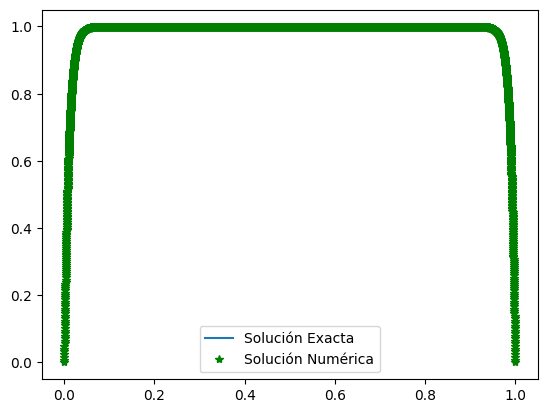

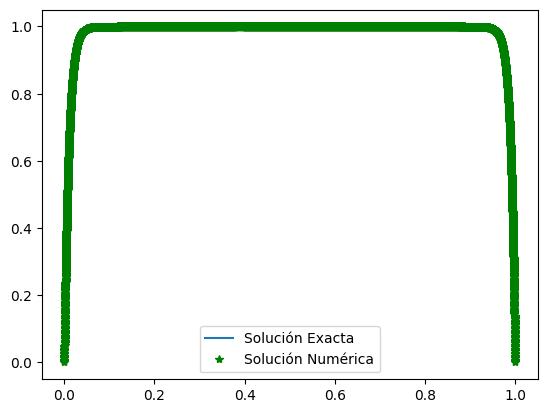

    p  k        dx    EL2(Ω)  EOCL2(Ω)    EH1(Ω)  EOCH1(Ω)
0   1  0  0.001000  0.000487         -  0.003615         -
1   1  1  0.000500  0.000245  0.992511  0.002061  0.810671
2   1  2  0.000250  0.000123  0.995798  0.001134  0.861946
3   1  3  0.000125  0.000061  0.997787  0.000597  0.926733
4   2  0  0.001000  0.000576         -  0.043615         -
5   2  1  0.000500  0.000258  1.161439  0.015694  1.474611
6   2  2  0.000250  0.000125  1.047753  0.005650  1.473968
7   2  3  0.000125  0.000062  1.012971  0.002052  1.461481
8   3  0  0.001000  0.000589         -  0.817022         -
9   3  1  0.000500  0.000259   1.18372  0.408053  1.001619
10  3  2  0.000250  0.000125  1.055131  0.203901  1.000889
11  3  3  0.000125  0.000062  1.014886  0.101918  1.000464


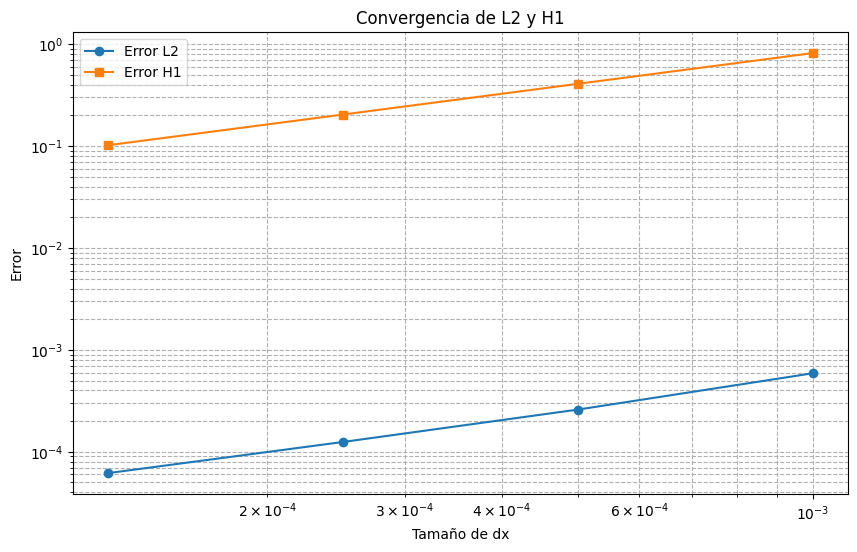

In [38]:
def calculate_EOC( xL, xR, xq, wq, epsilon,  f, u_exact):
    all_results = []  # Se inicia una lista para almacenar resultados para p=1 y p=2

    for p in [1, 2,3]:  # se calculara el error  para p=1 y p=2
        results = []
        dx_values = []
        L2_errors = []
        H1_errors = []

        for k in range(Nr):
            # Se define dx, y se resuelve para ese refinamiento
            dx = 0.001 * (0.5 ** k)
            el, eh =  Helmholtz(p, dx, xL, xR, xq, wq, epsilon, uL, uR, f, u_exact)
            # Se guardan los errores y el refinamiento
            dx_values.append(dx)
            L2_errors.append(el)
            H1_errors.append(eh)

            #Los resultados iniciales se agregan a ala primera fila
            if k == 0:
                results.append([p, k, dx, el, '-', eh, '-'])
            else:
                # Se calcula EOC para L2 y H1 con dx actual y anterior
                EOC_L2 = np.log(L2_errors[k] / L2_errors[k-1 ]) / np.log(dx_values[k] / dx_values[k-1])
                EOC_H1 = np.log(H1_errors[k] / H1_errors[k-1 ]) / np.log(dx_values[k] / dx_values[k-1])
                results.append([p, k, dx, el, EOC_L2, eh, EOC_H1])

        # Añadir los resultados de p al total
        all_results.extend(results)

    # Mostrar la tabla para ambos valores de p
    df = pd.DataFrame(all_results, columns=["p", "k", "dx", "EL2(Ω)", "EOCL2(Ω)", "EH1(Ω)", "EOCH1(Ω)"])
    print(df)
  #se grafican losresultados en escala logarítmica
    plt.figure(figsize=(10, 6))
    plt.loglog(dx_values, L2_errors, label="Error L2", marker='o')
    plt.loglog(dx_values, H1_errors, label="Error H1", marker='s')
    plt.xlabel("Tamaño de dx")
    plt.ylabel("Error")
    plt.legend()
    plt.title("Convergencia de L2 y H1")
    plt.grid(True, which="both", linestyle="--")
    plt.show()
# Ejecución con los parámetros iniciales
Nr = 4
xL, xR = 0, 1
q = 7
xq, wq = p_roots(q)
epsilon = 0.01
uL, uR = 0, 0
f = lambda x: 1
u_exact = lambda x: (-np.sinh(x / epsilon) + np.sinh((x - 1) / epsilon)) / np.sinh(1 / epsilon) + 1

calculate_EOC( xL, xR, xq, wq, epsilon,  f, u_exact)

